unsupervised ai

predicting acidity content based on varibales in red wine 

In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_blobs
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler

In [131]:
df = pd.read_csv('winequality-red.csv')


In [132]:
qualPred = df.drop('quality', axis=1).values
qual = df['quality'].values

In [133]:
X = np.column_stack((qualPred, qual))

In [134]:
bgmm = BayesianGaussianMixture(n_components=4, covariance_type='full', weight_concentration_prior_type='dirichlet_process', random_state=42)

In [135]:
bgmm.fit(X)
np.round(bgmm.weights_, 5)

array([0.08159, 0.15672, 0.29126, 0.47043])

In [136]:
X = StandardScaler().fit_transform(X)

In [137]:
bgmm.fit(X)

BayesianGaussianMixture(n_components=4, random_state=42)

In [138]:
print("Effective components:", np.sum(bgmm.weights_ > 1e-3))


Effective components: 4


In [139]:
print("means of clusters:\n", bgmm.means_)

means of clusters:
 [[-0.23003862  0.33862952 -0.33549577 -0.25227048 -0.10963068  0.09405895
   0.51076336  0.16948554  0.06649494 -0.46266143 -0.79920191 -0.49068765]
 [ 0.5226913  -0.65777769  0.65228787 -0.22047385 -0.20479526 -0.18166412
  -0.40710767  0.07862375 -0.28965707  0.20001543  0.35411134  0.4389122 ]
 [ 0.13442282  0.04412424  0.3710561   1.19285     0.90028853  0.2215816
   0.42018208  0.3835816  -0.40663397  0.61380904  0.03079179 -0.13047499]
 [-0.81535853  0.75400066 -1.13684107 -0.31346504 -0.27982539  0.01124521
  -0.34417657 -0.76311351  0.85270396 -0.28826868  0.44977892 -0.01931402]]


In [140]:

print("Covariance Matrices:\n", bgmm.covariances_)

Covariance Matrices:
 [[[ 3.03214958e-01  7.46439774e-02  1.61839635e-01  8.12610801e-02
    3.26611026e-02  7.20362980e-02  1.41784412e-01  1.99501310e-01
   -2.22623311e-01 -8.61660984e-03  1.66672519e-02 -2.57109752e-02]
  [ 7.46439774e-02  5.86438154e-01 -1.60348690e-01  8.77248592e-03
    2.42294784e-02 -9.57108323e-02 -1.28049023e-02  2.18342164e-02
   -7.25754291e-02 -3.00312148e-03  4.32129870e-02 -7.46529079e-02]
  [ 1.61839635e-01 -1.60348690e-01  5.02167123e-01  2.74430841e-02
    3.94021667e-02  1.83448480e-01  3.35537339e-01  9.14736090e-02
   -1.75185269e-01 -1.04129687e-02 -3.55055694e-02 -3.57253021e-02]
  [ 8.12610801e-02  8.77248592e-03  2.74430841e-02  9.09473871e-02
    1.50748939e-02  4.42719490e-02  9.19144224e-02  1.18398700e-01
   -1.37544356e-02  1.66934385e-02  7.19635925e-03 -4.48681444e-03]
  [ 3.26611026e-02  2.42294784e-02  3.94021667e-02  1.50748939e-02
    5.51095132e-02  2.96345491e-02  6.81881577e-02  3.53142343e-02
   -4.98078019e-02  1.60755426e-02 -

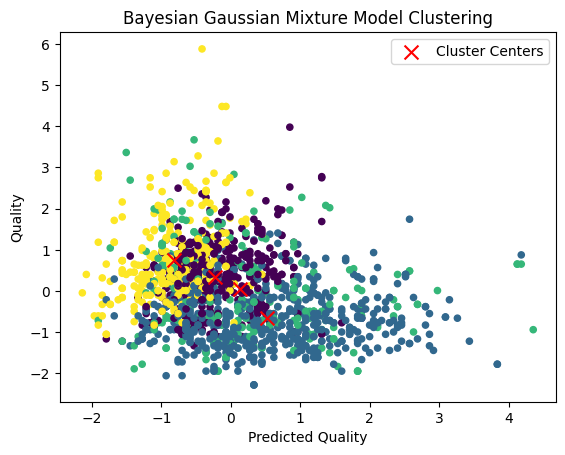

In [141]:
labels = bgmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(bgmm.means_[:, 0], bgmm.means_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title("Bayesian Gaussian Mixture Model Clustering")
plt.xlabel('Predicted Quality')
plt.ylabel('Quality')
plt.legend()
plt.show()